## Graph Generator

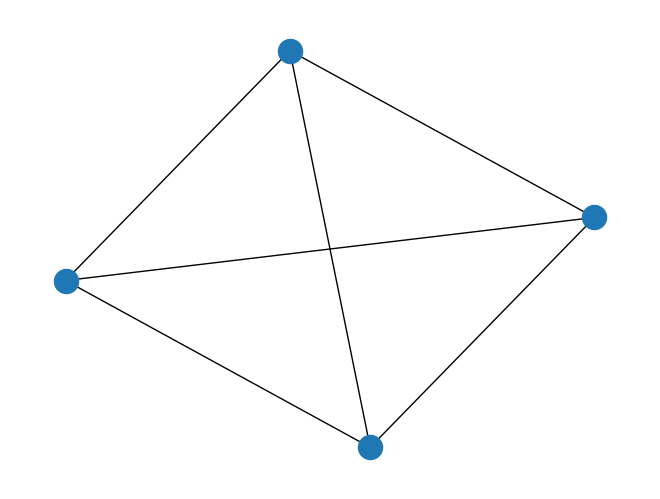

In [3]:
import data.random_graph_generator as rgg 
import networkx as nx
import matplotlib.pyplot as plt

#For the test, let's take a possible range of sizes of graphs 
sizes = range(3,11)

#Erdos-Renyi model generator
ergen = rgg.ERGenerator(sizes) #Let's use alpha = 1.3 the default value
G = ergen.generate()
nx.draw(G)
plt.draw()

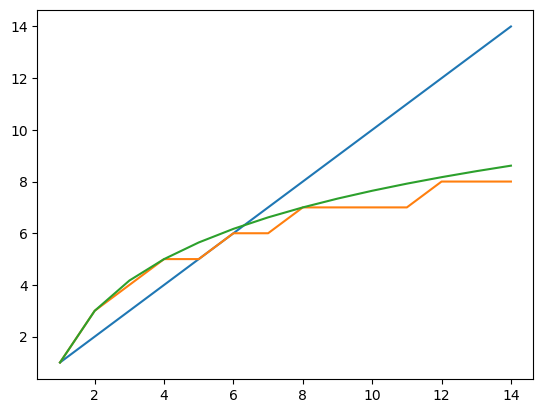

In [2]:
#Original git parameters 
import numpy as np 
import matplotlib.pyplot as plt 
M, FM = [], []
for n in range(1,15) : 
    m = int(2 * np.log2(n))+1
    fm = (2 * np.log2(n)) +1 
    M.append(m)
    FM.append(fm)
    
plt.plot(list(range(1,15)),list(range(1,15)))
plt.plot(list(range(1,15)), M)
plt.plot(list(range(1,15)), FM)
plt.show()

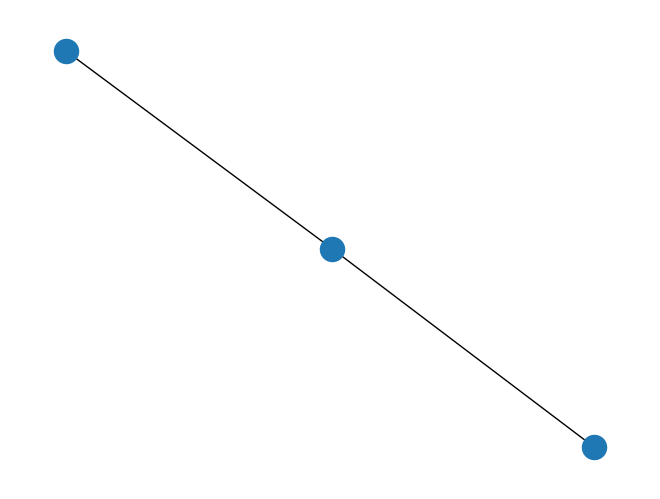

In [3]:
#Barabasi Albert model generator
bagen = rgg.BAGenerator(sizes)
G = bagen.generate()
nx.draw(G)

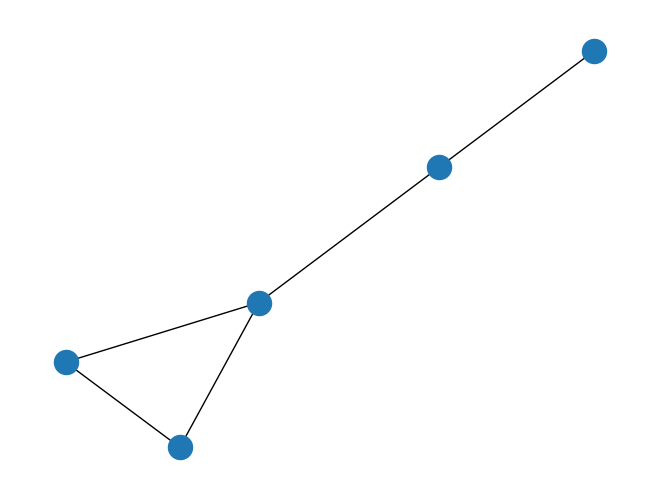

In [4]:
wsgen = rgg.WSGenerator(sizes)
G = wsgen.generate()
nx.draw(G)

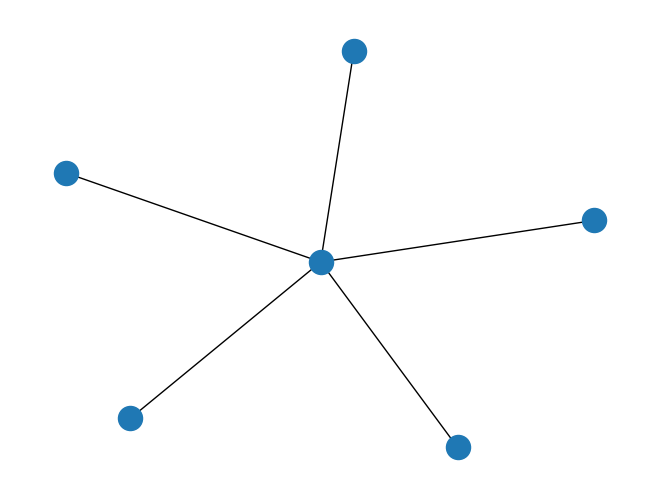

In [5]:
plcgen = rgg.PLCGenerator(sizes) #max_triangle_prob: float = 0.5
G = plcgen.generate()
nx.draw(G)

In [6]:
gen_list = [ergen,wsgen,bagen,plcgen]
rdgen = rgg.RandomGenerator(sizes)

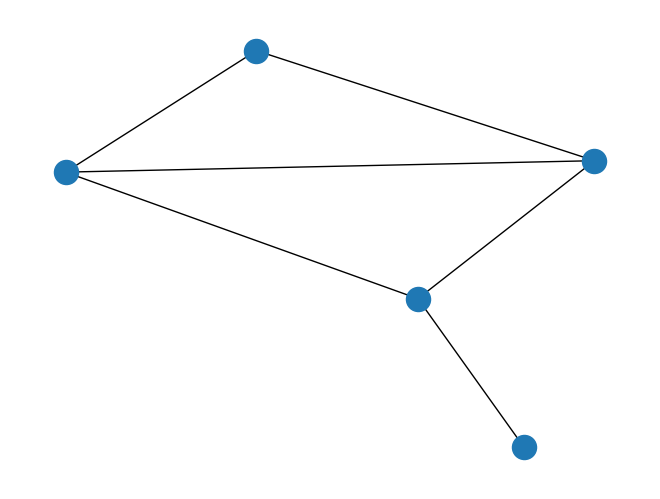

In [7]:
nx.draw(rdgen.generate())

## DataLoaders for On-The-Fly Data

### OTFContainer

In [ ]:
from data.loaders import OTFContainer
import data.random_graph_generator as rgg
sizes = range(3,11)
epoch_size = 2
batch_size = 64
generator = rgg.RandomGenerator(sizes)
dataset_length = (batch_size//2) * epoch_size
OTF_ds = OTFContainer(generator,dataset_length)

In [ ]:
for g in OTF_ds :
    print(g)
    break

In [ ]:
len(OTF_ds)

In [ ]:
OTF_ds[2]

In [ ]:
from torch_geometric.loader import DataLoader
single_loader_batch_size = batch_size//2
otf_dl = DataLoader(OTF_ds, batch_size=single_loader_batch_size)

In [ ]:
len(otf_dl)

In [ ]:
for k in otf_dl :
    print(k)

In [ ]:
otf_dl = DataLoader(OTF_ds, batch_size=single_loader_batch_size)
for a,b in zip(otf_dl,[1,2]) : 
    print(a)
    print(b)

### Dataloader

In [2]:
from data.loaders import gen_data_loaders
from data.random_graph_generator import random_generator
gen = random_generator(list(range(3,10)))
loaders = gen_data_loaders(10,64,generator=gen)

for i in loaders:
    print(i)


[None, None, None, None, None, None, None, None, None, None]


In [3]:
n = 1
for batch_target, batch_neg_target, batch_neg_query in zip(*loaders):
    print(f"cycle : {n}")
    n+=1
    print(f"Printing loader length : {len(loaders[0])}")
    
    print("batch_target : ")
    print(batch_target)
    
    print("batch_neg_target : ")
    print(batch_neg_target)

    
    print("batch_neg_query : ")
    print(batch_neg_query)

print("end")

cycle : 1
Printing loader length : 10
batch_target : 
DataBatch(edge_index=[2, 602], num_nodes=203, batch=[203], ptr=[33])
batch_neg_target : 
DataBatch(edge_index=[2, 478], num_nodes=180, batch=[180], ptr=[33])
batch_neg_query : 
None
cycle : 2
Printing loader length : 10
batch_target : 
DataBatch(edge_index=[2, 582], num_nodes=199, batch=[199], ptr=[33])
batch_neg_target : 
DataBatch(edge_index=[2, 518], num_nodes=186, batch=[186], ptr=[33])
batch_neg_query : 
None
cycle : 3
Printing loader length : 10
batch_target : 
DataBatch(edge_index=[2, 482], num_nodes=173, batch=[173], ptr=[33])
batch_neg_target : 
DataBatch(edge_index=[2, 424], num_nodes=172, batch=[172], ptr=[33])
batch_neg_query : 
None
cycle : 4
Printing loader length : 10
batch_target : 
DataBatch(edge_index=[2, 550], num_nodes=203, batch=[203], ptr=[33])
batch_neg_target : 
DataBatch(edge_index=[2, 602], num_nodes=195, batch=[195], ptr=[33])
batch_neg_query : 
None
cycle : 5
Printing loader length : 10
batch_target : 
Da

In [4]:
import networkx as nx
print(f"batch_target : {batch_target}\nlength : {len(batch_target)}\ntype : {type(batch_target)}") 
print(f"number of graphs : {batch_target.num_graphs}\nAs a list : \n{list(batch_target)}\nlist length : {len(list(batch_target))}")

batch_target : DataBatch(edge_index=[2, 630], num_nodes=197, batch=[197], ptr=[33])
length : 32
type : <class 'torch_geometric.data.batch.DataBatch'>
number of graphs : 32
As a list : 
[('edge_index', tensor([[  0,   0,   0,  ..., 196, 196, 196],
        [  1,   4,   2,  ..., 192, 193, 195]])), ('num_nodes', 197), ('batch', tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,
         2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,
         4,  4,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,  7,  7,  7,
         8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10,
        10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12,
        13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15,
        15, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18,
        18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 21, 21, 21,
        21, 21, 22, 22, 22, 22, 23

In [6]:
print(batch_target.get_example(0))

Data(edge_index=[2, 48], num_nodes=8)


## Batch handling

### Sample Subgraph on Batch

The first things to do when preparing batch is to sample the subgraph from our generated data. 

In [20]:
import data.random_graph_generator as rgg
from utils.torch_ml import to_pyg_data
gen = rgg.random_generator(list(range(5,15)))
g = to_pyg_data(gen.generate())
print(g)

Data(edge_index=[2, 20], num_nodes=8)


In [21]:
import random
min_size = 5
d = 1
k = random.randint(min_size - d,g.num_nodes-1)
print(k)

5


In [30]:
from torch_geometric.utils import k_hop_subgraph
from torch_geometric.data import Data
start_node = random.choice(list(range(g.num_nodes)))#Choose the starting point of the walk
neighood =k_hop_subgraph(start_node,k,g.edge_index)
print(f"starting node : {start_node},\nk-neighborhood : {neighood}")
pyg_graph = Data(edge_index=neighood[1])
pyg_graph.num_nodes = len(neighood[0])

starting node : 1,
k-neighborhood : (tensor([0, 1, 2, 3, 4, 5, 6, 7]), tensor([[0, 1, 1, 1, 2, 2, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 7, 7, 7],
        [5, 2, 4, 7, 1, 5, 4, 7, 1, 3, 5, 7, 0, 2, 4, 6, 5, 1, 3, 4]]), tensor([1]), tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True]))


In [31]:
int(neighood[2]) # This item gives the new id of start_node (most of the time it doesnt change bc it is the same graph)

1

Nb : With this method, the full graph is sample almost everytime (as predicted).

#### Hards Negs Modification

They only randomly add between 0 and 5 edges to the initial graph to disturb it

Data(edge_index=[2, 16])
Graph with 8 nodes and 8 edges


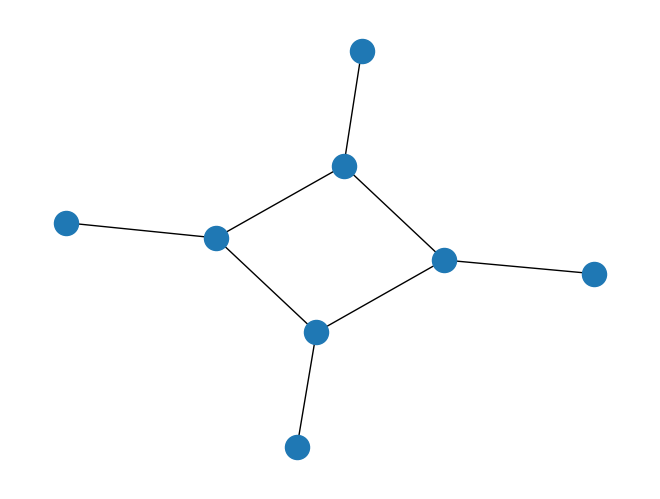

In [101]:
import networkx as nx
from torch_geometric.utils.convert import to_networkx
print(pyg_graph)
nx_ng = to_networkx(pyg_graph,to_undirected=True)
print(nx_ng)
nx.draw(nx_ng)
non_edges = list(nx.non_edges(nx_ng))

In [102]:
for u, v in random.sample(non_edges, random.randint(1, min(len(non_edges),5) )): #Adding up to a maximum of 5 edges more
    print(u,v)
    nx_ng.add_edge(u,v)


1 4
3 7
5 6


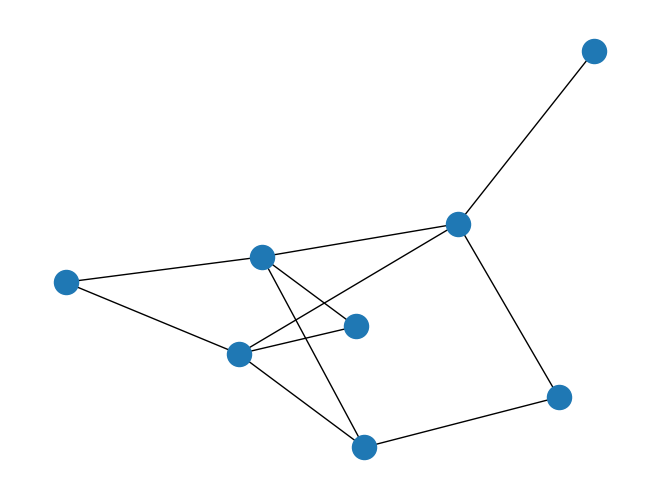

In [103]:
nx.draw(nx_ng)

#### Tagging the anchor

In [9]:
import random
done = False
k = 0
while not done:
    k+= 1
    if not (random.random() < 1.0) :
        done = True

print(k)

KeyboardInterrupt: 

In [10]:
print(k)

602380396


The initial code tag the encode with a node feature so it can be found.

In [16]:
import torch
anchor_feature =[]

import data.random_graph_generator as rgg
import random
from utils.torch_ml import to_pyg_data
from torch_geometric.utils import k_hop_subgraph
from torch_geometric.data import Data
gen = rgg.random_generator(list(range(5,15)))
g = to_pyg_data(gen.generate())
start_node = random.choice(list(range(g.num_nodes)))#Choose the starting point of the walk


for k in range(g.num_nodes):
    if k == start_node :
        anchor_feature.append(torch.ones(1))
    else :
        anchor_feature.append(torch.zeros(1))

g.x = torch.tensor(anchor_feature)

neighood =k_hop_subgraph(start_node,k,g.edge_index)

print(anchor_feature)

[tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([0.]), tensor([1.]), tensor([0.]), tensor([0.]), tensor([0.])]


In [17]:
neighood

(tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 tensor([[ 0,  1,  2,  2,  2,  3,  3,  4,  4,  5,  5,  6,  7,  7,  8,  8,  9,  9,
           9,  9, 10, 10],
         [ 4,  2,  1,  3,  9,  2,  9,  5,  0,  4, 10,  7,  6,  8,  7,  9,  8,  3,
           2, 10,  5,  9]]),
 tensor([7]),
 tensor([True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True]))

In [143]:
ng_graph = Data(x=torch.Tensor(anchor_feature),edge_index=neighood[1])       

In [144]:
ng_graph.x

tensor([0., 0., 1., 0., 0., 0., 0., 0.])

In [150]:
new_feat = torch.tensor(ng_graph.x,torch.ones(8))
new_feat

TypeError: tensor() takes 1 positional argument but 2 were given

In [128]:
ng_graph.num_node_features

1

#### Testing full version

In [1]:
from data.batchs import sample_subgraph
import data.random_graph_generator as rgg
from utils.torch_ml import to_pyg_data

gen = rgg.random_generator(list(range(5,15)))
g = to_pyg_data(gen.generate())
print(g)

Data(edge_index=[2, 84], num_nodes=14)


In [2]:
sample_subgraph(g,True)

(Data(edge_index=[2, 12], num_nodes=6, x=[6]),
 Data(x=[6], edge_index=[2, 12], num_nodes=6))

In [3]:
target, query = sample_subgraph(g,True)
print(target.x)
print(query.x)

tensor([0., 1., 0., 0., 0., 0.])
tensor([0., 1., 0., 0., 0., 0.])


In [4]:
print(query.x.dtype)
print(query.x.size())

torch.float32
torch.Size([6])


**NB** : I'll maybe have to pu a tens.unsqueeze(0) in sample_subgraph so I have a feature vector of a good dimension.

In [2]:
sample_subgraph(g,True,True)

(Data(edge_index=[2, 84], num_nodes=14, x=[14]),
 Data(edge_index=[2, 90], num_nodes=14, x=[14]))

In [4]:
target, query = sample_subgraph(g,True,True)
print(target.x)
print(query.x)

tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])
tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])


### Batch Augmentation 

In [12]:
from data.loaders import gen_data_loaders
import data.random_graph_generator as rgg

epoch_size = 10
gen = rgg.random_generator(list(range(5,15)))
loaders = gen_data_loaders(epoch_size,batch_size= 64,generator=gen)

for batch_target, batch_neg_target, batch_neg_query in zip(*loaders): #Unzipping for test 
    break

for g in batch_target.to_data_list():
    print(g)

Data(edge_index=[2, 52], num_nodes=13)
Data(edge_index=[2, 80], num_nodes=14)
Data(edge_index=[2, 24], num_nodes=6)
Data(edge_index=[2, 132], num_nodes=13)
Data(edge_index=[2, 18], num_nodes=10)
Data(edge_index=[2, 20], num_nodes=6)
Data(edge_index=[2, 72], num_nodes=10)
Data(edge_index=[2, 48], num_nodes=12)
Data(edge_index=[2, 18], num_nodes=9)
Data(edge_index=[2, 50], num_nodes=8)
Data(edge_index=[2, 24], num_nodes=11)
Data(edge_index=[2, 20], num_nodes=10)
Data(edge_index=[2, 22], num_nodes=6)
Data(edge_index=[2, 14], num_nodes=7)
Data(edge_index=[2, 48], num_nodes=11)
Data(edge_index=[2, 60], num_nodes=10)
Data(edge_index=[2, 10], num_nodes=6)
Data(edge_index=[2, 24], num_nodes=9)
Data(edge_index=[2, 48], num_nodes=10)
Data(edge_index=[2, 80], num_nodes=12)
Data(edge_index=[2, 26], num_nodes=14)
Data(edge_index=[2, 88], num_nodes=14)
Data(edge_index=[2, 84], num_nodes=11)
Data(edge_index=[2, 34], num_nodes=7)
Data(edge_index=[2, 94], num_nodes=12)
Data(edge_index=[2, 108], num_nod

In [13]:
from data.batchs import sample_subgraph
target, query = [], []
for g in batch_target.to_data_list():
    g_target, g_query = sample_subgraph(g,True)
    target.append(g_target)
    query.append(g_query)

print(len(query))

32


In [14]:
import random
hard_neg_idxs = set(random.sample(range(batch_neg_target.batch_size), int(batch_neg_target.batch_size * 1/2)))
hard_neg_idxs

{2, 4, 12, 13, 14, 15, 16, 17, 18, 21, 23, 25, 27, 28, 29, 30}

In [15]:
import torch_geometric.data as pyg_data
from utils.torch_ml import to_pyg_data
batch_neg_query = pyg_data.Batch.from_data_list( #The question is why do they generate it here better than in the Dataloader
            [to_pyg_data(gen.generate(size=len(g))) if i not in hard_neg_idxs else g for i, g in enumerate(batch_neg_target.to_data_list())])

In [16]:
batch_neg_query

DataBatch(edge_index=[2, 814], num_nodes=196, batch=[196], ptr=[33])

In [17]:
for i, g in enumerate(batch_neg_query.to_data_list()):
    g["idx"] = i 

In [18]:
print(g.idx)
print(g)
print(batch_neg_query.get_example(31))

31
Data(edge_index=[2, 2], num_nodes=2, idx=31)
Data(edge_index=[2, 2], num_nodes=2)


In [19]:
batch_neg_query["idx"] = list(range(32))

In [20]:
print(batch_neg_query)
print(batch_neg_query.get_example(31))

DataBatch(edge_index=[2, 814], num_nodes=196, batch=[196], ptr=[33], idx=[32])
Data(edge_index=[2, 2], num_nodes=2)


In [24]:
del batch_neg_query["idx"]

In [26]:
target = list()
for i, g in enumerate(batch_neg_query.to_data_list()):
    g["idx"] = i 
    target.append(g)

In [29]:
print(batch_neg_query)
print(batch_neg_query.get_example(31))
new_batch = pyg_data.Batch.from_data_list(target)
print(new_batch)

DataBatch(edge_index=[2, 814], num_nodes=196, batch=[196], ptr=[33])
Data(edge_index=[2, 2], num_nodes=2)
DataBatch(edge_index=[2, 814], num_nodes=196, idx=[32], batch=[196], ptr=[33])


In [2]:
from torch_geometric.data import Batch
Batch.from_data_list()

DataBatch(edge_index=[2, 1382], num_nodes=318, batch=[318], ptr=[33])

### Generating full batch 

In [26]:
import random
import numpy as np
import networkx as nx

from torch_geometric.data import Batch
from data.random_graph_generator import random_generator
from data.loaders import gen_data_loaders
from utils.torch_ml import to_pyg_data

epoch_size = 10
gen = random_generator(np.arange(5 + 1, 29 + 1))
loaders = gen_data_loaders(epoch_size,batch_size= 64,generator=gen)

print(loaders)

for batch_target, batch_neg_target, batch_neg_query in zip(*loaders): #Unzipping for test 
    break


neg_target = batch_neg_target

hard_neg_idxs = set(random.sample(range(neg_target.num_graphs),
            int(neg_target.num_graphs/2)))                          #That can be modify, int(...) is kept here to approach the original code approximation (even if num_graph//2 would be better)

batch_neg_query = Batch.from_data_list(
            [to_pyg_data(gen.generate(size=len(g))) if i not in hard_neg_idxs else g for i, g in enumerate(neg_target.to_data_list())])

#pos_a, pos_b, neg_a, neg_b = gen_batch(batch_target,batch_neg_target, batch_neg_query, True,generator=gen)

[<torch_geometric.loader.dataloader.DataLoader object at 0x169ec6d10>, <torch_geometric.loader.dataloader.DataLoader object at 0x169ec4a10>, [None, None, None, None, None, None, None, None, None, None]]


In [27]:
from data.batchs import augment_batch
pos_a, pos_b, neg_a, neg_b = augment_batch(batch_target,batch_neg_target, gen)


In [28]:
pos_a

DataBatch(edge_index=[2, 2898], num_nodes=584, x=[584, 1], batch=[584], ptr=[33])

In [4]:
pos_b

DataBatch(edge_index=[2, 3084], num_nodes=542, x=[542], batch=[542], ptr=[33])

In [29]:
neg_a

DataBatch(edge_index=[2, 3424], num_nodes=578, x=[578, 1], batch=[578], ptr=[33])

In [30]:
neg_b

DataBatch(edge_index=[2, 1764], num_nodes=314, x=[312, 1], batch=[314], ptr=[33])

In [40]:
weird = []
for k in neg_b.to_data_list():
    if len(k.x) != k.num_nodes:
        weird.append(k)
        print(k)
    
    

Data(edge_index=[2, 40], x=[15, 1], num_nodes=17)


In [42]:
weird[0]

Data(edge_index=[2, 40], x=[15, 1], num_nodes=17)

In [37]:
len(k.x)

2

**NB** : With this methodology, we can already see here that there is actually a huge bias. All positives are the same size (target_len = query_len) whereas negative are different (at least for most easy_neg)

## Testing the model

### Generating a dummy embedding

In [36]:
from models.NM import NeuroMatchNetwork
model = NeuroMatchNetwork()

In [37]:
#Generating a random graph
import data.random_graph_generator as rgg 
from utils.torch_ml import to_pyg_data
gen = rgg.RandomGenerator(list(range(5,15)))
graph = to_pyg_data(gen.generate())
graph


Data(edge_index=[2, 18], num_nodes=9)

In [38]:
import torch
graph_list = []
for k in range(2*64):
    graph = to_pyg_data(gen.generate())
    graph.x = torch.tensor([1.]*graph.num_nodes).unsqueeze(-1) #Adding a fake feature data (float type is important)
    graph_list.append(graph)
    
#graph_list

In [40]:
graph #the unsqueeze of graph.x is used to have the good size/dim. 

Data(edge_index=[2, 14], num_nodes=5, x=[5, 1])

In [41]:
from torch_geometric.loader import DataLoader
dl = DataLoader(graph_list,batch_size=32)
dl

In [42]:
batch_data = next(iter(dl))
batch_data

DataBatch(edge_index=[2, 1462], num_nodes=315, x=[315, 1], batch=[315], ptr=[33])

In [43]:
batch_data.x.dim()

2

In [44]:
emb = model.forward(batch_data)

In [45]:
print(emb.size())

torch.Size([32, 64])


In [46]:
emb 

tensor([[ 0.1904,  0.0721, -0.1632,  ...,  0.1149,  0.1721, -0.2369],
        [ 0.1056, -0.0930, -0.2209,  ...,  0.3229,  0.3128, -0.4645],
        [ 0.2048,  0.1056, -0.1663,  ...,  0.1489,  0.1584, -0.2458],
        ...,
        [ 0.1324, -0.4184, -0.3347,  ...,  0.8349,  0.6550, -0.8937],
        [ 0.1374,  0.0754, -0.1358,  ...,  0.1131,  0.1322, -0.1949],
        [ 0.1236,  0.0587, -0.1307,  ...,  0.1249,  0.1169, -0.1999]],
       grad_fn=<AddmmBackward0>)

In [47]:
type(emb)

torch.Tensor

### Testing the loss function

Let's just do a dummy test set so we can compute a loss function and test it. 

In [13]:
pos_target = emb
temp = []
for batch in dl : 
    temp.append(model.forward(batch))


In [14]:
pos_query = temp[0]
neg_target = temp[1]
neg_query = temp[2]
neg_query

tensor([[ 4.0105,  7.5832, -2.1290,  ..., -7.3668,  4.8554, -7.6438],
        [ 0.1217,  0.2224,  0.0370,  ..., -0.2555,  0.2151, -0.1094],
        [ 0.1121,  0.1828,  0.0324,  ..., -0.2023,  0.1840, -0.1021],
        ...,
        [ 0.1130,  0.1838,  0.0328,  ..., -0.2038,  0.1840, -0.1034],
        [ 1.0535,  1.3580, -0.5728,  ..., -1.6421,  0.9346, -1.2360],
        [ 0.1977,  0.2792, -0.0562,  ..., -0.4150,  0.1788, -0.1669]],
       grad_fn=<AddmmBackward0>)

In [15]:
from models.NM import nm_criterion
loss = nm_criterion(pos_target,pos_query,neg_target,neg_query)
loss


tensor(151.2669, grad_fn=<AddBackward0>)

In [16]:
type(loss)

torch.Tensor

### Testing the prediction function

In [17]:
emb_targets = torch.cat((pos_target, neg_target), dim=0)
emb_subgraphs = torch.cat((pos_query, neg_query), dim=0)

In [18]:
emb_targets.shape

torch.Size([64, 64])

In [19]:
e = torch.sum(torch.max(torch.zeros_like(emb_targets,
        device=emb_targets.device), emb_subgraphs - emb_targets)**2, dim=1)

In [20]:
print(e.shape)
e

torch.Size([64])


tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 6.7139e+02, 1.4864e+00, 3.2721e-01, 2.1908e+01,
        8.7414e+00, 2.9327e+00, 1.5590e-01, 1.5081e+00, 1.0351e+00, 3.3881e-02,
        3.9801e+00, 3.4216e-01, 3.1747e-01, 7.4659e-01, 3.4868e-01, 2.0807e+01,
        1.2526e-01, 5.3773e-01, 4.2841e+01, 2.2550e+02, 8.9955e+00, 2.4989e+01,
        8.6705e+01, 1.5233e+01, 2.0502e+03, 1.5574e-01, 1.4007e+01, 2.1584e+02,
        2.7606e+01, 4.2688e-01, 7.9100e+00, 4.0409e+01],
       grad_fn=<SumBackward1>)

**NB** : We can see here that positive examples have a differences of 0. It's probably due to the fact that the query graph is exactly the same than the target graph. Hence, they have exactly the same embedding. 

In [21]:
e < 0.1

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False])

In [22]:
#We should have the same result with nm_predict 
from models.NM import nm_predict
nm_predict(emb_targets,emb_subgraphs)

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False])

## Training and Multiprocessing

In [1]:
from data.loaders import gen_data_loaders
from data.random_graph_generator import random_generator
from models.NM import NeuroMatchNetwork
from data.batchs import augment_batch
import numpy as np
from models.NM import nm_criterion, treshold_predict
import torch 
import torch.nn as nn
from utils.torch_ml import get_device
generator = random_generator(np.arange(5 + 1, 29 + 1))
loaders = gen_data_loaders(generator=generator)


model = NeuroMatchNetwork()

lr=1e-4
weight_decay = 0.0

In [2]:
pos_batch, neg_batch, _ = next(zip(*loaders))
model.train()
model.zero_grad()
pos_target, pos_query, neg_target, neg_query = augment_batch(pos_batch,neg_batch,generator)


In [3]:
pos_target

DataBatch(edge_index=[2, 2920], num_nodes=517, x=[517, 1], batch=[517], ptr=[33])

In [14]:
pos_target.num_graphs

32

In [4]:
emb_pos_tar = model(pos_target)
emb_pos_que = model(pos_query)
emb_neg_tar = model(neg_target)
emb_neg_que = model(neg_query)

In [5]:

loss = nm_criterion(emb_pos_tar,emb_pos_que,emb_neg_tar,emb_neg_que)
loss.backward()

In [6]:
loss

tensor(157.4094, grad_fn=<AddBackward0>)

In [7]:
emb_pos_tar

tensor([[-3.0746e-01,  1.2995e-01, -2.3700e-01,  ..., -1.5261e-01,
         -5.0514e-01,  2.1074e-01],
        [-1.3283e+02,  2.4576e+02, -3.3402e+01,  ..., -3.2589e+02,
         -5.6849e+02,  2.6004e+02],
        [-3.8679e+00,  1.2708e+01, -5.1141e+00,  ..., -9.9388e+00,
         -2.1877e+01,  9.8002e+00],
        ...,
        [-8.0023e-01,  3.4176e-01, -5.7153e-01,  ..., -5.0873e-01,
         -1.1833e+00,  3.5927e-01],
        [-8.1834e-01,  7.4689e-01, -8.9009e-01,  ..., -6.5353e-01,
         -1.7568e+00,  1.0452e+00],
        [-8.0913e-01,  3.5198e-01, -5.4030e-01,  ..., -4.7215e-01,
         -1.1987e+00,  4.0407e-01]], grad_fn=<AddmmBackward0>)

In [13]:
emb_pos_tar.size()

torch.Size([32, 64])

In [8]:
emb_target = torch.cat((emb_pos_tar, emb_neg_tar), dim=0)
emb_query = torch.cat((emb_pos_que, emb_neg_que), dim=0)
pred_treshold = treshold_predict(emb_target,emb_query) #Let's not use the treshold model 
pred_treshold

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True, False,  True, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False,  True, False,  True, False, False,
        False, False, False, False])

In [10]:
emb_target.size()

torch.Size([64, 64])

### Using a Linear Model in place of the treshold

In [74]:
pred = torch.sum(torch.max(torch.zeros_like(emb_target,
            device=emb_target.device), emb_query - emb_target)**2, dim=1)
pred

tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 6.5803e-01, 1.9485e+01, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 9.6615e+03, 2.5826e+01, 7.3877e+01, 5.6479e+00,
        1.8232e+00, 2.7836e+04, 5.5772e+02, 2.5724e+00, 2.4178e+00, 3.8795e+03,
        8.2904e+00, 2.0479e+06, 8.5947e+02, 1.2372e-01, 7.1501e+00, 1.1845e+02,
        7.4171e+01, 1.8434e+00, 9.9047e+00, 8.5190e-01, 3.2220e+01, 2.1945e+00,
        1.7915e-01, 4.0260e-01, 2.3962e-03, 1.0434e+00, 2.4698e+00, 1.7140e+06,
        1.7814e-01, 1.5320e+04, 6.2501e+01, 1.8974e+06],
       grad_fn=<SumBackward1>)

In [75]:
pred.shape

torch.Size([64])

In [76]:
pred.unsqueeze(1).shape

torch.Size([64, 1])

In [77]:
labels = torch.tensor([1.]*32 + [0.]*32).to(get_device()).unsqueeze(1)
pred = pred.unsqueeze(1)
print(labels)
print(pred)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])
tensor([[0.0000e+00],
        [0.0000e+00],
        [0.0000e+00],
        [0.0000e+00],
        [0.0000

In [78]:
clf_model = nn.Sequential(nn.Linear(1, 1), nn.LogSoftmax())
pred = clf_model(pred)
print(pred)
criterion = nn.BCELoss()
clf_loss = criterion(pred, labels) 
clf_loss

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], grad_fn=<LogSoftmaxBackward0>)


/opt/anaconda3/envs/testNeuro/lib/python3.11/site-packages/torch/nn/modules/module.py:1511: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


tensor(50., grad_fn=<BinaryCrossEntropyBackward0>)

In [79]:
labels.size()

torch.Size([64, 1])

In [80]:
pred.size()

torch.Size([64, 1])

In [81]:
pred = pred.argmax(dim = -1)

In [82]:
pred

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [83]:
acc = torch.mean((pred == labels).type(torch.float))

In [84]:
acc

tensor(0.5000)

In [87]:
print(float(True))
print(float(False))

1.0
0.0


### NeuroMatchPred Class Test 

In [47]:
from models.NM import NeuroMatchPred
from utils.torch_ml import get_device
import torch
predict = NeuroMatchPred()
emb_targets = torch.rand(64,64).to(get_device())
emb_querys = torch.rand(64,64).to(get_device())

In [48]:
predict.predict(emb_targets,emb_querys)

tensor([[-6.8581e+00, -1.0515e-03],
        [-4.4132e+00, -1.2190e-02],
        [-5.2697e+00, -5.1586e-03],
        [-4.8996e+00, -7.4773e-03],
        [-4.7331e+00, -8.8385e-03],
        [-6.3343e+00, -1.7761e-03],
        [-5.2261e+00, -5.3891e-03],
        [-5.3998e+00, -4.5276e-03],
        [-7.2954e+00, -6.7890e-04],
        [-6.8880e+00, -1.0205e-03],
        [-7.1651e+00, -7.7337e-04],
        [-5.4177e+00, -4.4470e-03],
        [-4.3226e+00, -1.3355e-02],
        [-7.8573e+00, -3.8700e-04],
        [-5.1900e+00, -5.5874e-03],
        [-5.5184e+00, -4.0202e-03],
        [-5.2896e+00, -5.0567e-03],
        [-6.7696e+00, -1.1489e-03],
        [-7.1513e+00, -7.8409e-04],
        [-6.8605e+00, -1.0490e-03],
        [-3.2037e+00, -4.1459e-02],
        [-4.5880e+00, -1.0225e-02],
        [-4.3863e+00, -1.2525e-02],
        [-6.4968e+00, -1.5094e-03],
        [-6.2094e+00, -2.0124e-03],
        [-6.0375e+00, -2.3904e-03],
        [-6.5152e+00, -1.4819e-03],
        [-7.2502e+00, -7.102

In [49]:
labels = torch.tensor([1]*32 + [0]*32).to(get_device())
predict.model.train()
for k in range(30000) : 
    pos = torch.rand(32,64).to(get_device()) #This method of generation of embedding is also use for the pre_training
    neg_tar = torch.rand(32,64).to(get_device())
    neg_que = torch.rand(32,64).to(get_device())
    shuf = torch.randperm(64)
    emb_targets = torch.cat((pos, neg_tar), dim=0)[shuf]
    emb_querys = torch.cat((pos, neg_que), dim=0)[shuf]
    pred , loss = predict.train(emb_targets,emb_querys,labels[shuf])
    pred = pred.argmax(dim=-1)
    acc = torch.mean((pred == labels[shuf]).type(torch.float)).item()
    print(f"loss : {loss}, k : {k}, acc : {acc}", end="                          \r")

In [20]:
pred

tensor([0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
        1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0])

In [22]:
labels[shuf]

tensor([0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
        1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0])

In [11]:
predict.predict(emb_targets,emb_querys)

tensor([[ 0.0000e+00, -3.5879e+01],
        [-9.9962e+00, -4.5537e-05],
        [-9.9962e+00, -4.5537e-05],
        [ 0.0000e+00, -3.7824e+01],
        [-9.9962e+00, -4.5537e-05],
        [ 0.0000e+00, -2.5216e+01],
        [ 0.0000e+00, -3.9245e+01],
        [-9.9962e+00, -4.5537e-05],
        [-9.9962e+00, -4.5537e-05],
        [ 0.0000e+00, -2.1004e+01],
        [ 0.0000e+00, -3.4078e+01],
        [ 0.0000e+00, -2.3927e+01],
        [-9.9962e+00, -4.5537e-05],
        [ 0.0000e+00, -5.1205e+01],
        [-9.9962e+00, -4.5537e-05],
        [-9.9962e+00, -4.5537e-05],
        [-9.9962e+00, -4.5537e-05],
        [-9.9962e+00, -4.5537e-05],
        [-9.9962e+00, -4.5537e-05],
        [-9.9962e+00, -4.5537e-05],
        [ 0.0000e+00, -3.5447e+01],
        [ 0.0000e+00, -4.4335e+01],
        [ 0.0000e+00, -3.4954e+01],
        [ 0.0000e+00, -3.9013e+01],
        [-9.9962e+00, -4.5537e-05],
        [-9.9962e+00, -4.5537e-05],
        [-9.9962e+00, -4.5537e-05],
        [ 0.0000e+00, -4.875

### Testing the train() function

In [1]:
from train import train
import torch.multiprocessing as mp
import numpy as np 
from models.NM import NeuroMatchNetwork, NeuroMatchPred
import data.random_graph_generator as rgg
mp.set_start_method("spawn",force=True)
emb_model = NeuroMatchNetwork()
pred_model = NeuroMatchPred()
emb_model.share_memory()
pred_model.model.share_memory()
generator = rgg.random_generator(np.arange(6,30))

Pretrain Prediction Model


In [2]:
in_queue, out_queue = mp.Queue(), mp.Queue()
workers = []
worker = mp.Process(target=train, args=(emb_model,pred_model,generator,in_queue,out_queue))
worker.start()
print(f"Worker {0} PID : {worker.pid}")
workers.append(worker)

Worker 0 PID : 19126


In [142]:
in_queue.put("step")
_, (loss, acc, _) = out_queue.get()
print(f"loss : {loss:.4f}, acc : {acc:.4f}", end="           \r")
in_queue.put("done")
del loss, acc

In [1]:
from train import train_loop
train_loop()

Pretrain Prediction Model
Worker 0 PID : 19402
Worker 1 PID : 19403
Worker 2 PID : 19404
Worker 3 PID : 19405
Worker 4 PID : 19406
Worker 5 PID : 19407


KeyboardInterrupt: 